In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

In [64]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
data = cg.get_coins_markets(vs_currency='usd')

df = pd.DataFrame(data)
print(df.shape)
df.head()

(100, 26)


,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,23133.000000,445950109132,1,4.857874e+11,3.402881e+10,23316.000,...,2.100000e+07,21000000.0,69045.00,-66.50764,2021-11-10T14:24:11.849Z,67.810000,34002.73449,2013-07-06T00:00:00.000Z,None,2023-01-31T14:50:08.275Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1584.440000,190951089936,2,1.909511e+11,8.742214e+09,1597.980,...,1.205161e+08,NaN,4878.26,-67.51896,2021-11-10T14:24:19.604Z,0.432979,365855.50615,2015-10-20T00:00:00.000Z,"{'times': 90.61629800587346, 'currency': 'btc'...",2023-01-31T14:50:24.174Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.999993,67810849792,3,6.781085e+10,4.411460e+10,1.011,...,6.781134e+10,NaN,1.32,-24.33373,2018-07-24T00:00:00.000Z,0.572521,74.86464,2015-03-02T00:00:00.000Z,None,2023-01-31T14:50:17.707Z
3,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,0.999784,42696087305,4,4.269271e+10,3.043129e+09,1.016,...,4.270108e+10,NaN,1.17,-14.68524,2019-05-08T00:40:28.300Z,0.891848,12.18184,2021-05-19T13:14:05.611Z,None,2023-01-31T14:50:31.751Z
4,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,312.000000,42091509989,5,6.239917e+10,5.683299e+08,313.820,...,1.572196e+08,200000000.0,686.31,-54.55972,2021-05-10T07:24:17.097Z,0.039818,783118.59824,2017-10-19T00:00:00.000Z,None,2023-01-31T14:50:01.291Z


<AxesSubplot:xlabel='market_cap', ylabel='total_volume'>

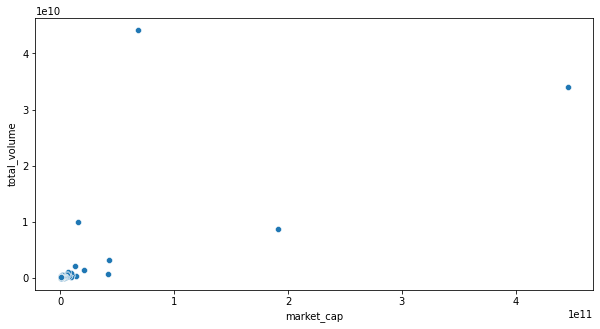

In [4]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="market_cap", y='total_volume', data=df)

<AxesSubplot:xlabel='market_cap', ylabel='total_volume'>

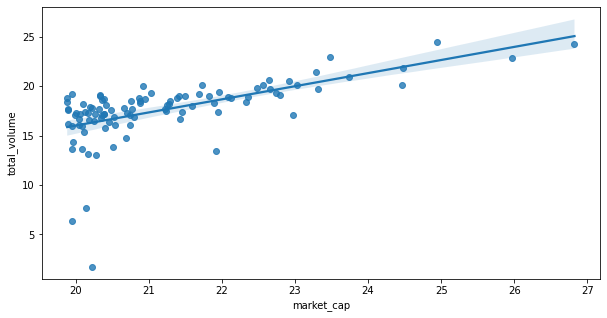

In [29]:
plt.figure(figsize=(10,5))
sns.regplot(x=np.log(df["market_cap"]), y=np.log(df['total_volume']))

In [5]:
scaler = MinMaxScaler()

df[["market_cap_scaled", "total_volume_scaled"]] = scaler.fit_transform(df[["market_cap", "total_volume"]])
df[["market_cap_scaled", "total_volume_scaled"]].describe()

,market_cap_scaled,total_volume_scaled
count,100.000000,100.000000
mean,0.022041,0.025943
std,0.109314,0.128179
min,0.000000,0.000000
25%,0.000376,0.000467
50%,0.001325,0.001299
75%,0.006259,0.004234
max,1.000000,1.000000


<AxesSubplot:xlabel='market_cap_scaled', ylabel='total_volume_scaled'>

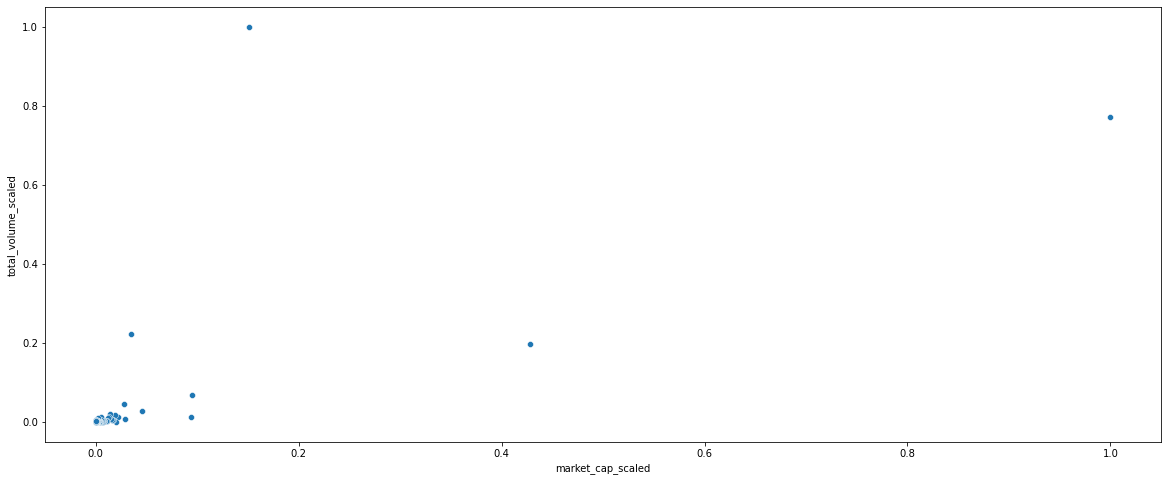

In [24]:
plt.figure(figsize=(20,8))
sns.scatterplot(x="market_cap_scaled", y='total_volume_scaled', data=df, ) #hue="name"

<AxesSubplot:xlabel='market_cap_scaled', ylabel='total_volume_scaled'>

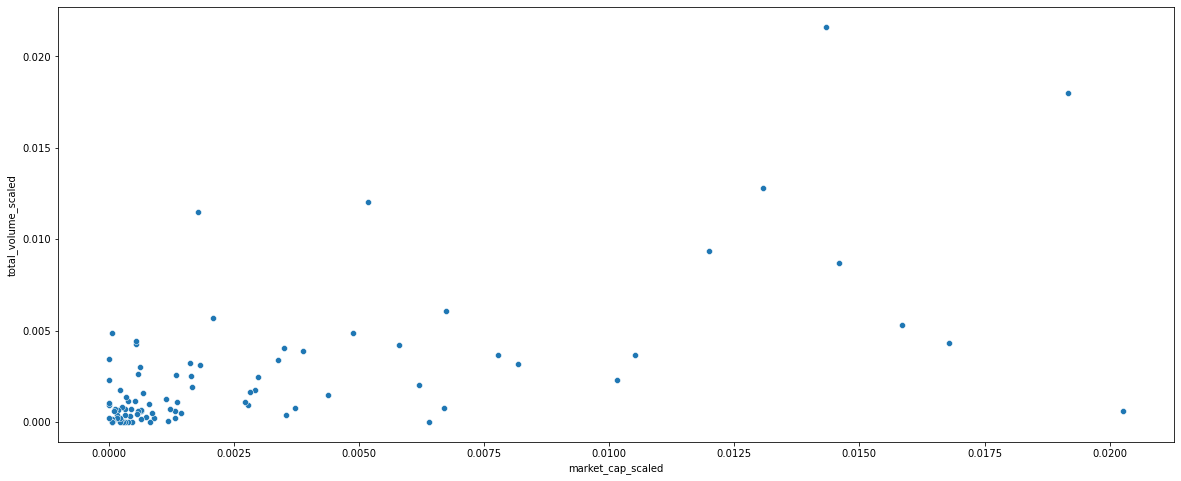

In [26]:
plt.figure(figsize=(20,8))
sns.scatterplot(x="market_cap_scaled", y='total_volume_scaled', data=df.iloc[10:], ) 

In [7]:
df["mc_by_volume"] = df["market_cap_scaled"] / df['total_volume_scaled']
df["volume_by_mc"] = df["total_volume_scaled"] / df['market_cap_scaled']
df.replace([np.inf, -np.inf], 0, inplace=True)

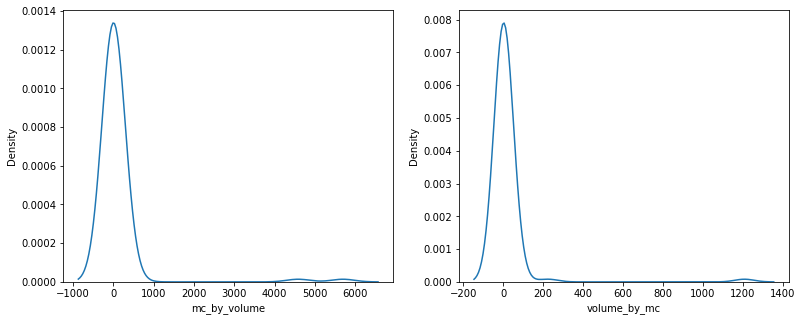

In [8]:
plt.figure(figsize=(13,5))
 
plt.subplot(1,2,1)
sns.kdeplot(df["mc_by_volume"])

plt.subplot(1,2,2)
sns.kdeplot(df["volume_by_mc"])

plt.show()

In [9]:
df[["mc_by_volume", "volume_by_mc"]].describe()

,mc_by_volume,volume_by_mc
count,100.000000,100.000000
mean,110.169525,17.216372
std,728.111266,122.650504
min,0.000000,0.000000
25%,0.429676,0.340986
50%,1.102847,0.824775
75%,2.848351,2.163693
max,5699.431444,1207.867489


In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

df.nlargest(3, "mc_by_volume")

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,market_cap_scaled,total_volume_scaled,mc_by_volume,volume_by_mc
79,cdai,cdai,cDAI,https://assets.coingecko.com/coins/images/9281...,0.02212,560167219,80,560167153.00000,2229.20000,0.02220,...,2020-10-12T21:29:00.007Z,0.00729,203.47141,2020-03-18T04:29:40.819Z,None,2023-01-31T14:49:29.449Z,0.00029,0.00000,5699.43144,0.00018
94,compound-ether,ceth,cETH,https://assets.coingecko.com/coins/images/1064...,31.80000,459147910,95,459203746.00000,587.84000,32.07000,...,2021-11-21T12:39:57.508Z,1.89000,1585.96780,2020-03-13T02:22:33.711Z,None,2023-01-31T14:49:38.398Z,0.00006,0.00000,4586.25444,0.00022
24,leo-token,leo,LEO Token,https://assets.coingecko.com/coins/images/8418...,3.53000,3287615520,25,nan,676018.00000,3.65000,...,2022-02-08T17:40:10.285Z,0.79986,340.09469,2019-12-24T15:14:35.376Z,None,2023-01-31T14:50:30.153Z,0.00641,0.00002,418.24804,0.00239


<AxesSubplot:xlabel='market_cap_scaled', ylabel='total_volume_scaled'>

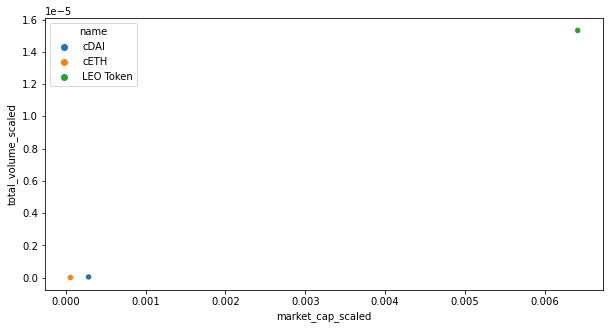

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="market_cap_scaled", y='total_volume_scaled', data=df.nlargest(3, "mc_by_volume"), hue="name")

In [12]:
outlier_quans = df['mc_by_volume'].quantile([0.1, 0.75, 0.8, 0.9, 0.95])

In [13]:
df[df["mc_by_volume"] > outlier_quans[0.95]]

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,market_cap_scaled,total_volume_scaled,mc_by_volume,volume_by_mc
24,leo-token,leo,LEO Token,https://assets.coingecko.com/coins/images/8418...,3.53000,3287615520,25,nan,676018.00000,3.65000,...,2022-02-08T17:40:10.285Z,0.79986,340.09469,2019-12-24T15:14:35.376Z,None,2023-01-31T14:50:30.153Z,0.00641,0.00002,418.24804,0.00239
56,kucoin-shares,kcs,KuCoin,https://assets.coingecko.com/coins/images/1047...,8.25000,803241350,57,nan,1005140.00000,8.35000,...,2021-12-01T15:09:35.541Z,0.34286,2307.27502,2019-02-07T00:00:00.000Z,None,2023-01-31T14:50:19.164Z,0.00083,0.00002,36.55366,0.02736
70,gatechain-token,gt,Gate,https://assets.coingecko.com/coins/images/8183...,4.41000,641374510,71,nan,480987.00000,4.43000,...,2021-05-12T11:39:16.531Z,0.25754,1613.04315,2020-03-13T02:18:02.481Z,None,2023-01-31T14:49:34.083Z,0.00047,0.00001,43.06508,0.02322
79,cdai,cdai,cDAI,https://assets.coingecko.com/coins/images/9281...,0.02212,560167219,80,560167153.00000,2229.20000,0.02220,...,2020-10-12T21:29:00.007Z,0.00729,203.47141,2020-03-18T04:29:40.819Z,None,2023-01-31T14:49:29.449Z,0.00029,0.00000,5699.43144,0.00018
94,compound-ether,ceth,cETH,https://assets.coingecko.com/coins/images/1064...,31.80000,459147910,95,459203746.00000,587.84000,32.07000,...,2021-11-21T12:39:57.508Z,1.89000,1585.96780,2020-03-13T02:22:33.711Z,None,2023-01-31T14:49:38.398Z,0.00006,0.00000,4586.25444,0.00022


In [22]:
df.nlargest(20, columns="mc_by_volume")["name"].values

array(['cDAI', 'cETH', 'LEO Token', 'Gate', 'KuCoin', 'OKB',
       'Gemini Dollar', 'Pax Dollar', 'Radix', 'Cronos', 'Toncoin', 'BNB',
       'Frax', 'Quant', 'Uniswap', 'Huobi', 'Rocket Pool',
       'Lido Staked Ether', 'Cardano', 'BTSE Token'], dtype=object)

In [82]:
X = df[["market_cap_scaled"]]
y = df["total_volume_scaled"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

lr = LinearRegression()
lr.fit(X_train, y_train)

print(r2_score(X_train, y_train))

print(r2_score(X_test, y_test))

(70, 1) (30, 1) (70,) (30,)
-2.912016221194934
0.9379619980179706


In [83]:
X = np.log(df[["market_cap"]])
y = np.log(df["total_volume"])

X.replace([np.inf, -np.inf], 0, inplace=True)
y.replace([np.inf, -np.inf], 0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

lr = LinearRegression()
lr.fit(X_train, y_train)

print(r2_score(X_train, y_train))
print(r2_score(X_test, y_test))

(70, 1) (30, 1) (70,) (30,)
-11.364529683681068
-4.669501916072056


In [1]:
pip install python-telegram-bot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.6/552.6 KB 2.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 KB 4.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 KB 5.2 MB/s eta 0:00:00
  Using cached sniffio-1.3.0-py3-none-any.whl (10 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
  Using cached exceptiongroup-1.2.0-py3-none-any.whl (16 kB)
You should consider upgrading via the '/Users/I301903/Documents/GitHub/my-crypto-world/my_crypto_dashboard/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
from telegram import Bot, error
import asyncio


In [13]:
bot = Bot(token='6503903873:AAFGdH8kXNi5Xkay8WTMwdLb3Xi4LS5PtOg')

async def send_msg():
    await bot.send_message(chat_id='-1002005170631', text='Hello, This is a test message')

In [18]:
await send_msg()
print("HI")

HI


In [22]:
async def my_coroutine():
    await bot.send_message(chat_id='-1002005170631', text='Hello, This is a test message')
    return "Coroutine executed"

    # Create a new event loop
    loop = asyncio.new_event_loop()

    # Set the event loop for the current context
    asyncio.set_event_loop(loop)

    try:
        # run the coroutine
        result = loop.run_until_complete(my_coroutine())
        print(result)
    finally:
        # close the event loop
        loop.close()

In [23]:
await my_coroutine()

'Coroutine executed'